In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *

env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [10]:
#Importo un xml de prueba

#G=f_xml2graph(r'.\\partituras\\Queen_-_Bohemian_Rhapsody.mxl')
#G=f_xml2graph(r'.\\partituras\\Here_Comes_The_Sun_-_The_Beatles.mscz.mxl')
#G=f_xml2graph(r'.\\partituras\\Mozart__Rondo_Ala_Turca.mxl')
#G=f_xml2graph(r'.\\partituras\\Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major.mxl')
#G=f_xml2graph(r'.\\partituras\\Bach_Toccata_and_Fugue_in_D_Minor_Piano_solo.mxl')
#G=f_xml2graph(r'.\\partituras\\bachcelloprelude.mxl')
H=f_xml2graph(r'.\\partituras\\queen_underpressure.mxl', 'Bass Guitar')


song = msc.converter.parse(r'.\\partituras\\13725_ice_ice_baby.mxl') # Lee la cancion, queda un elemento stream.Score

Lp = len(song.parts) # Cantidad de partes (voces)
lista_partes = list(np.zeros(Lp)) # Crea una lista donde se van a guardas los nombres de las partes

for i,elem in enumerate(song.parts):
        lista_partes[i] = elem.partName

                
G=f_xml2graph(r'.\\partituras\\13725_ice_ice_baby.mxl', lista_partes[1])


#--------------------------------------------------
#Canción de prueba

#sBach = msc.corpus.parse('bach/bwv57.8')
#sBach.show()

Parte seleccionada: Bass Guitar
Parte seleccionada: Contrabajo


In [3]:
#la idea es hacer una funcion que tome un grafo y realice el grafico de distribucion de grados de los nodos. 
#Grafica en distintas escalas. Fitea para sacar el exponente si es scale free

def f_grado_dist_M(G):
    
    H=G.copy()
    nodos=H.nodes() 
    N=len(nodos)
    #calculo los grados que salen y entran de cada nodo
    kgrados_out = [H.out_degree(nodo) for nodo in nodos]
    kgrados_in = [H.in_degree(nodo) for nodo in nodos]
    
    
    # Contamos la cantidad de nodos que tienen un cierto k_grado, usando la funcion np.unique()
    # Guardamos el resultado en la variable histograma
    histograma_out = np.unique(kgrados_out,return_counts=True)
    k_out = histograma_out[0] # grados
    pk_out = histograma_out[1]/float(N) # pk = Nk/N, donde N es el numero total de nodos (cuentas normalizadas)

    #idem in
    histograma_in = np.unique(kgrados_in,return_counts=True)
    k_in = histograma_in[0] # grados
    pk_in = histograma_in[1]/float(N) # pk = Nk/N, donde N es el numero total de nodos (cuentas normalizadas)
    
    
    # Escala logaritmica en ambos ejes
    plt.figure(figsize=(16,8))
    plt.suptitle('Bin lineal - Escala log',fontsize=25)
    
    plt.subplot(1, 2, 1)
    plt.plot(k_out,pk_out,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$log (k)$',fontsize=20)
    plt.ylabel('$log (p_{k})$',fontsize=20)
    plt.title('Enlaces salientes',fontsize=20)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_in,pk_in,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$log (k)$', fontsize=20)
    plt.ylabel('$log (p_{k})$', fontsize=20)
    plt.title('Enlaces entrantes',fontsize=20)

    plt.show()
   
    return(k_in, k_out, pk_in, pk_out, N)

In [4]:
def f_grado_dist_H(G):
    
    H=G.copy()
    nodos=H.nodes() 
    N=len(nodos)
    #calculo los grados que salen y entran de cada nodo
    kgrados = [H.degree(nodo) for nodo in nodos]
    
    
    # Contamos la cantidad de nodos que tienen un cierto k_grado, usando la funcion np.unique()
    # Guardamos el resultado en la variable histograma
    histograma = np.unique(kgrados,return_counts=True)
    k = histograma[0] # grados
    pk = histograma[1]/float(N) # pk = Nk/N, donde N es el numero total de nodos (cuentas normalizadas)
    

    maxgrado = max(k) #maximo grado

    logbin = np.logspace(0,np.log10(maxgrado),num=20,endpoint=True,base=10) # bineado en base 10

    histograma_logbin = np.histogram(kgrados,bins=logbin,density=False)
    
    # Normalizamos por el ancho de los bines y creamos el vector bin_centros
    bin_centros = []
    pk_logbin = []

    for i in range(len(logbin)-1):
        bin_centros.append((logbin[i+1]+logbin[i])/2)
        bin_ancho = logbin[i+1]-logbin[i]
        pk_logbin.append(histograma_logbin[0][i]/(bin_ancho*N)) #normalizamos por el ancho del bin y por el numero total de nodos

    
    plt.figure()
    
    plt.plot(bin_centros,pk_logbin,'bo')
    plt.xlabel('$log$ $k$')
    plt.xscale('log')
    plt.ylabel('$log$ $pk$')
    plt.yscale('log')
    plt.title('Bin log - Escala log')
    plt.show()

    #Parametros:
    #alpha=-2.087157 #el que nos da la funcion power_law_fit como exponente 
    #print ('Power-law Exponente: {}'.format(alpha))
    #ksat= 5.0  #el que no da la funcino power_law_fit y figura como cutoff
    #kcut=max(k)     #es el mayor grado que aparece en la red

    #grafico el power law
    #x=np.linspace(1,max(k),2000)
    #plt.plot(x,x**(alpha),'r')
    #plt.show()
   
    return(k, pk, N)

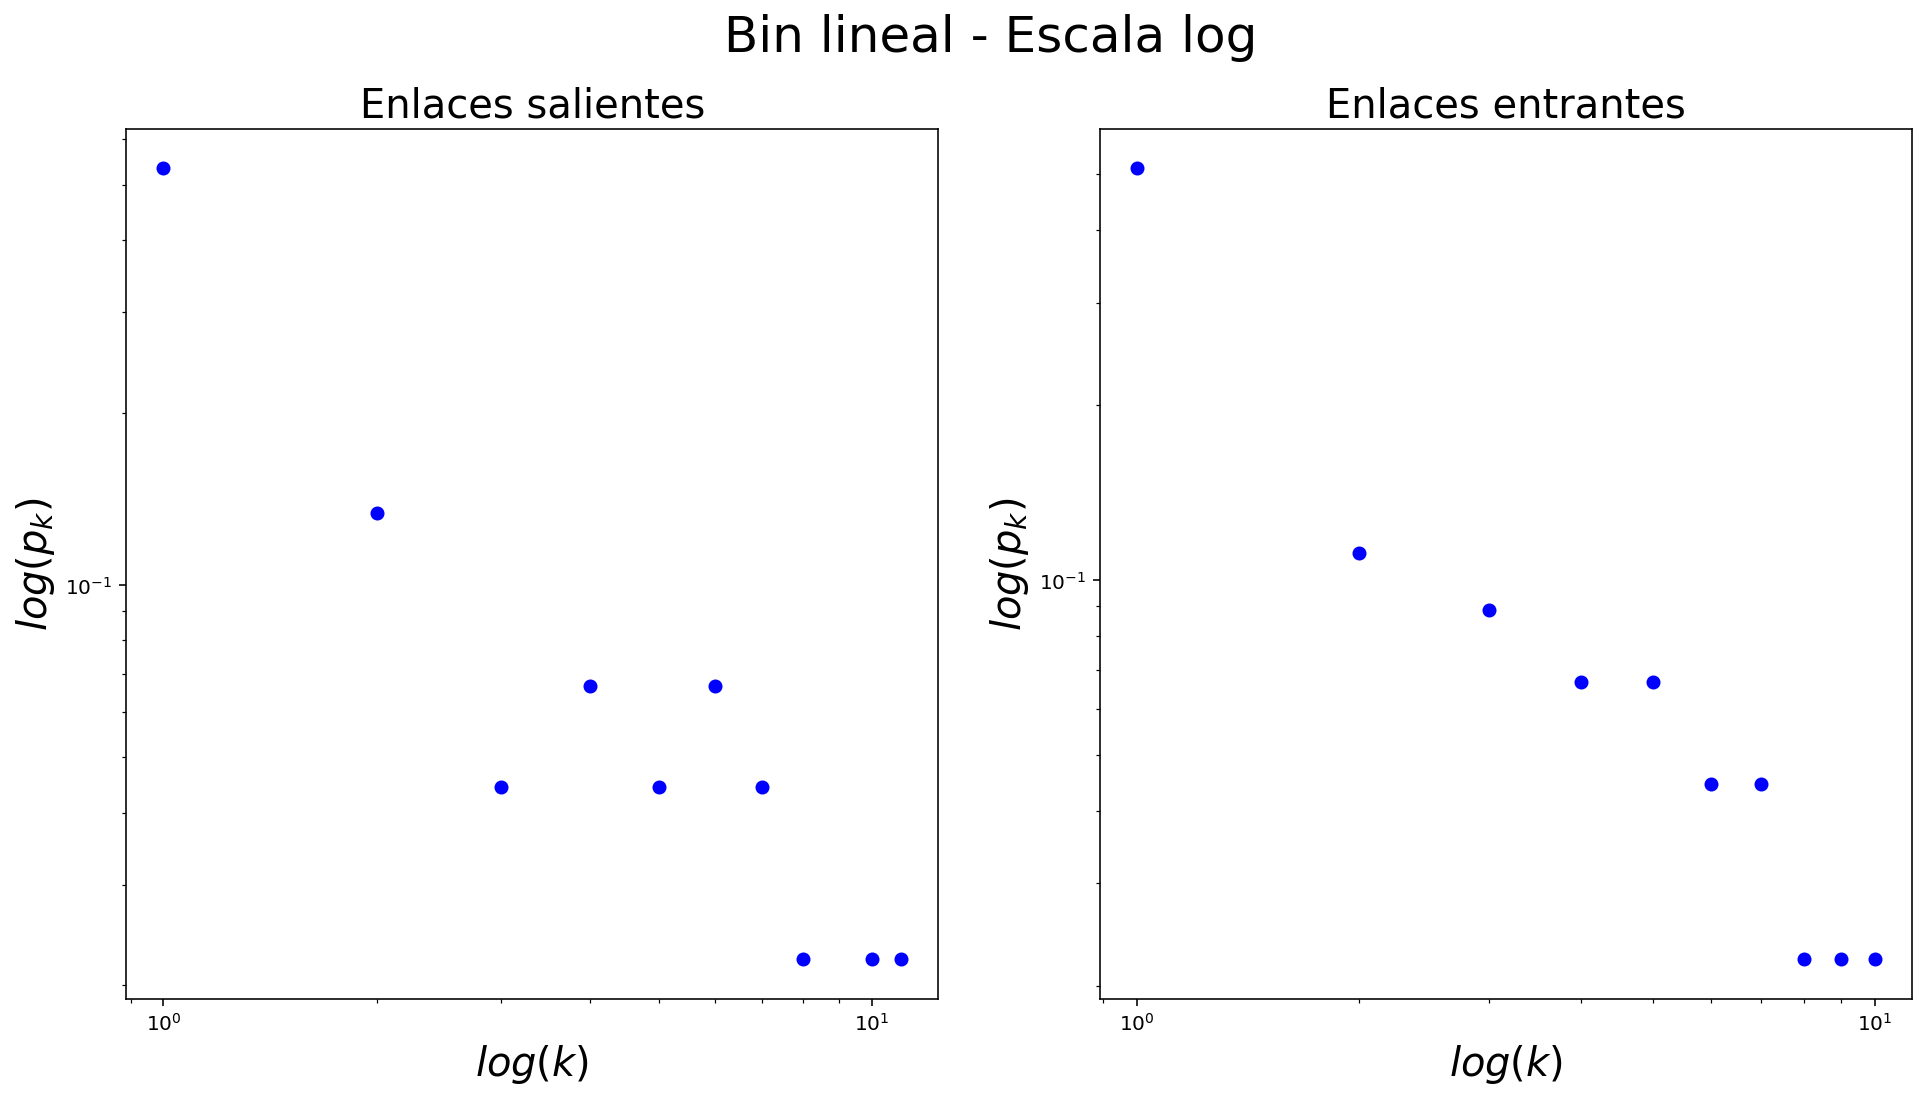

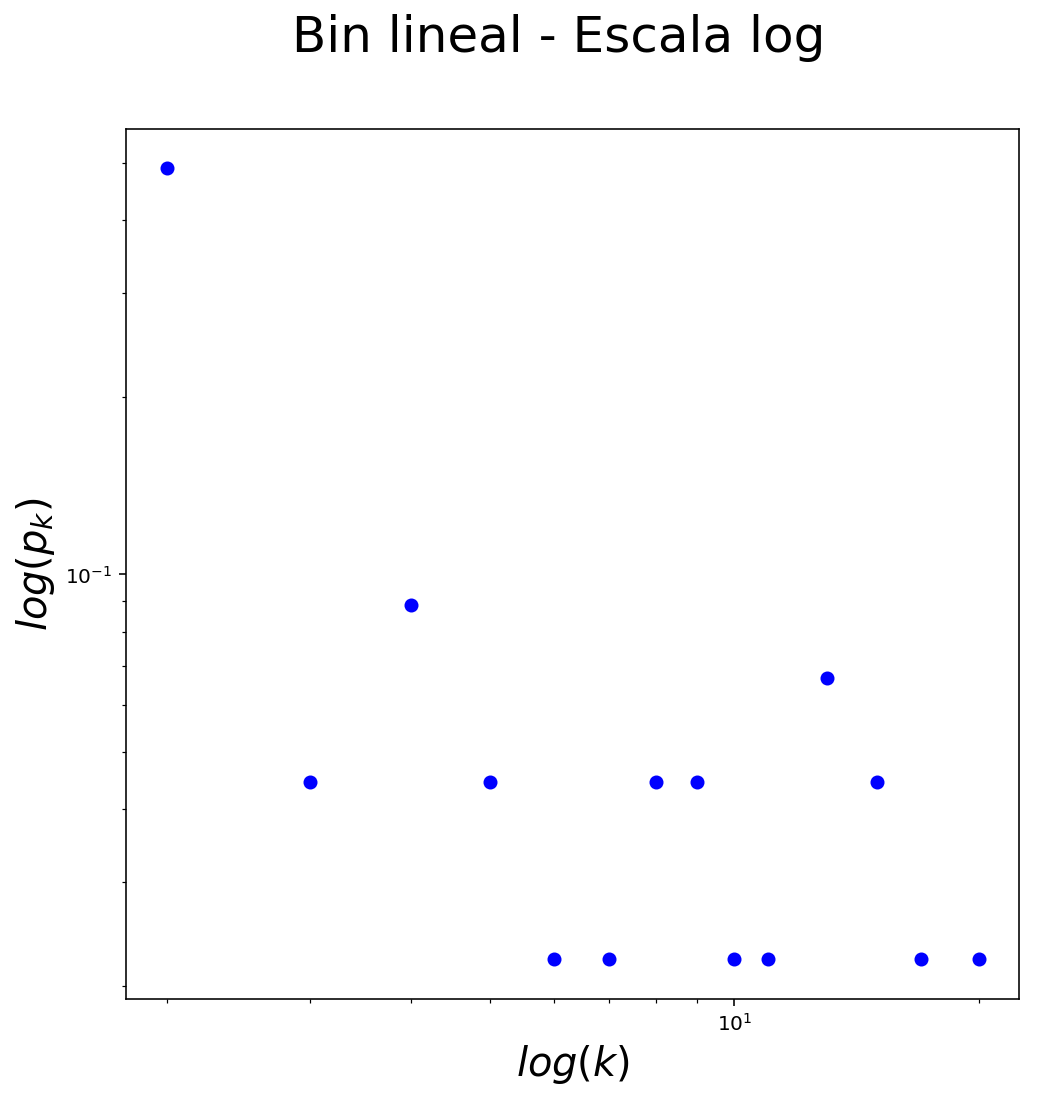

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 20]),
 array([0.48888889, 0.04444444, 0.08888889, 0.04444444, 0.02222222,
        0.02222222, 0.04444444, 0.04444444, 0.02222222, 0.02222222,
        0.06666667, 0.04444444, 0.02222222, 0.02222222]),
 45)

In [98]:
f_grado_dist_M(G)
f_grado_dist_H(G)

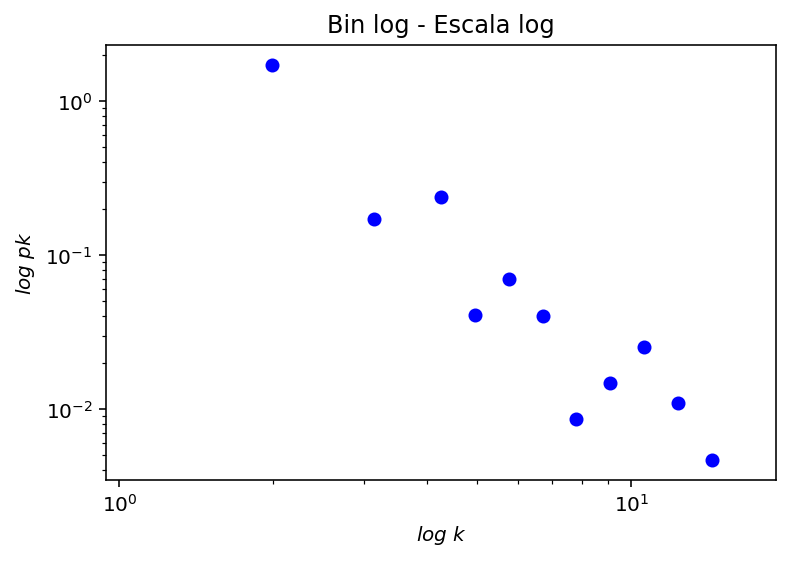

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 18]),
 array([0.52040816, 0.08163265, 0.15306122, 0.03061224, 0.06122449,
        0.04081633, 0.01020408, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.01020408, 0.01020408]),
 98)

In [109]:
f_grado_dist_H(G)

In [146]:
def f_tabla(G,nombre):
    
    H=G.copy()
    nodos=H.nodes() 
    N=len(nodos)
    
    #calculo los grados que salen y entran de cada nodo
    kgrados_out = [H.out_degree(nodo) for nodo in nodos]
    kgrados_in = [H.in_degree(nodo) for nodo in nodos]

    # El grado medio se puede calcular mediante k_mean=2m/n, donde m es la cantidad de enlaces total y n la cant de nodos
    nodes = H.number_of_nodes()
    edges = H.number_of_edges()
    K_mean = round(2*float(edges)/nodes)
    
    #veo para el out
    histograma_out = np.unique(kgrados_out,return_counts=True)
    k_out = histograma_out[0] # grados que salen
    n_out = len(k_out)
    
    K_mean_out= sum(k_out)/n_out
    K_min_out=np.unique(k_out)[0]    
    K_max_out= np.unique(k_out)[n_out-1]
    
    
    #idem para el in
    histograma_in = np.unique(kgrados_in,return_counts=True)
    k_in = histograma_in[0] # grados que entran
    n_in = len(k_in)
    
    K_mean_in= sum(k_in)/n_in
    K_max_in=np.unique(k_in)[0]    
    K_min_in= np.unique(k_in)[n_in-1]

    # Densidad de la red uso density(G) (d = numero enlaces/enlaces maximos posibles)
    d = nx.density(H)

    # Coef de clustering medio:
    # c_1 = #triangulos con vertice en 1 / triangulos posibles con vertice en 1
    # C_mean es el promedio de los c_i sobre todos los nodos de la red
    C_mean = nx.average_clustering(H)

    # Clausura transitiva de la red o Global Clustering o Transitividad:
    # C_g = 3*nx.triangles(G1) / sumatoria sobre (todos los posibles triangulos)
    C_gclust = nx.transitivity(H)

    # Para calcular el diametro (la maxima longitud) primero hay que encontrar el mayor subgrafo conexo
    
    if nx.is_directed(G) == False:
        giant_graph = max(nx.connected_component_subgraphs(H),key=len)
        diam = nx.diameter(giant_graph)
    else:
        diam='NaN'
    
    dist=nx.average_shortest_path_length(H)
    dist=round(dist,2)
            

    # Creamos la tabla con las caracteristicas de las redes
    haytabla = pd.DataFrame({"Red":[nombre],
                        "Nodos":[nodes],
                        "Enlaces":[edges],
                        "<K>":[K_mean],
                        "<K_{in}>":[K_mean_in],
                        "<K_{out}>":[K_mean_out],
                        "K_{in} max":[K_max_in],
                        "K_{in} min":[K_min_in],
                        "K_{out} max":[K_max_out],
                        "K_{out} min":[K_min_out],
                        "Densidad":[d],
                        "<C_local>":[C_mean],
                        "C_global":[C_gclust],
                        "Diametro":[diam],
                        "<Min Dist>":[dist],
                       })
    
    
    return(haytabla)

In [147]:
f_tabla(G,'Chopin')

,Red,Nodos,Enlaces,<K>,<K_{in}>,<K_{out}>,K_{in} max,K_{in} min,K_{out} max,K_{out} min,Densidad,<C_local>,C_global,Diametro,Min Dist Prom
0,Chopin,98,196,4,5.0,5.0,1,9,9,1,0.020619,0.115317,0.084135,NaN,6.0


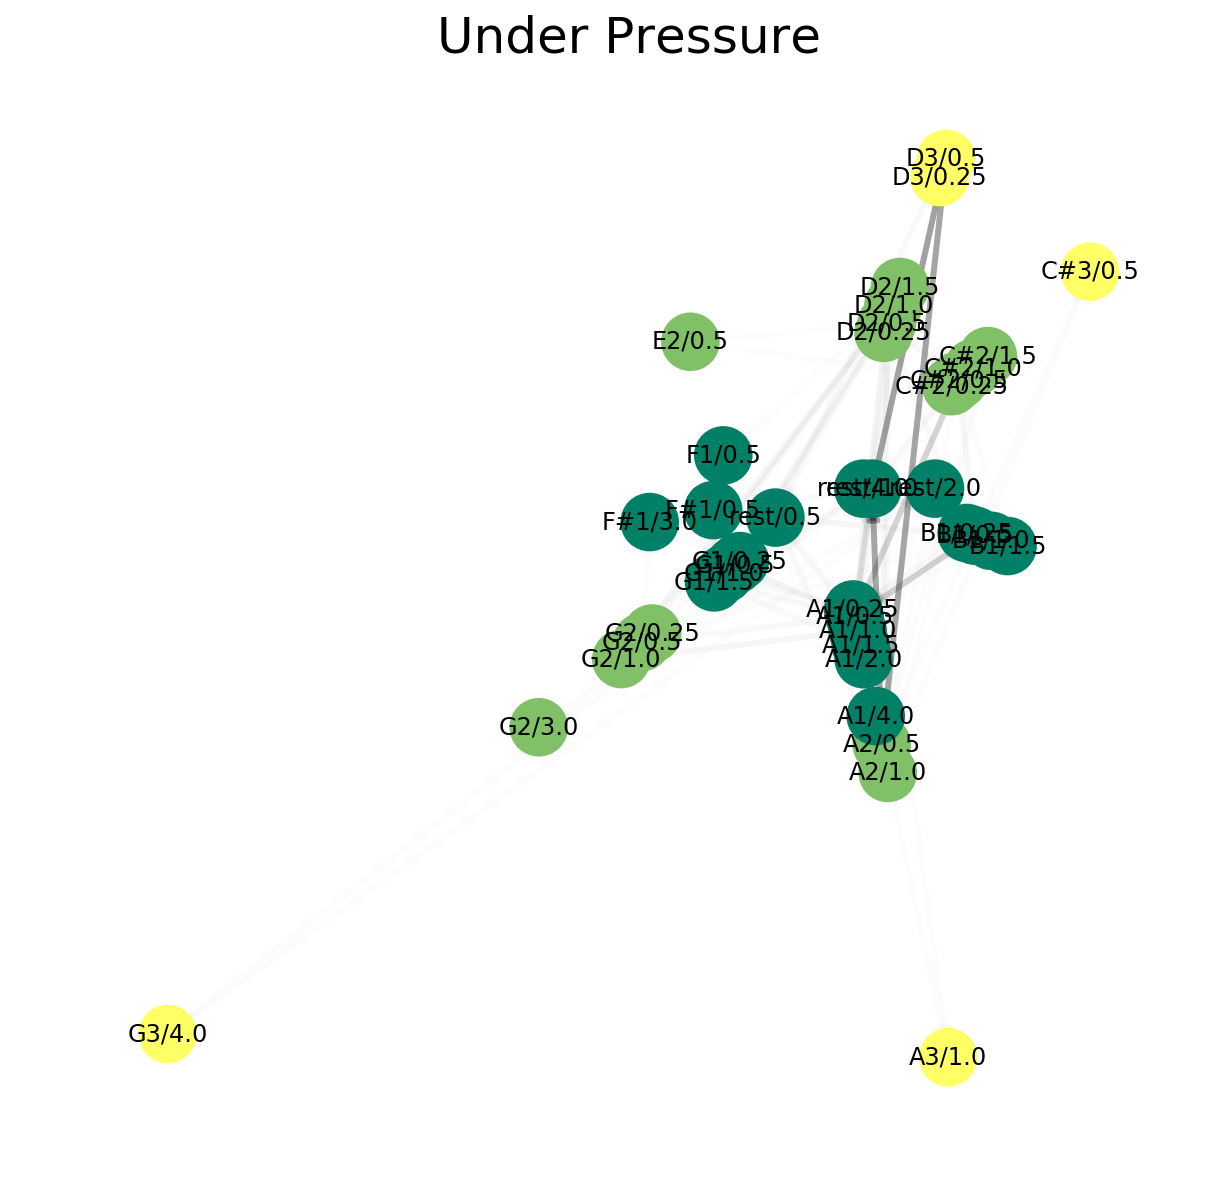

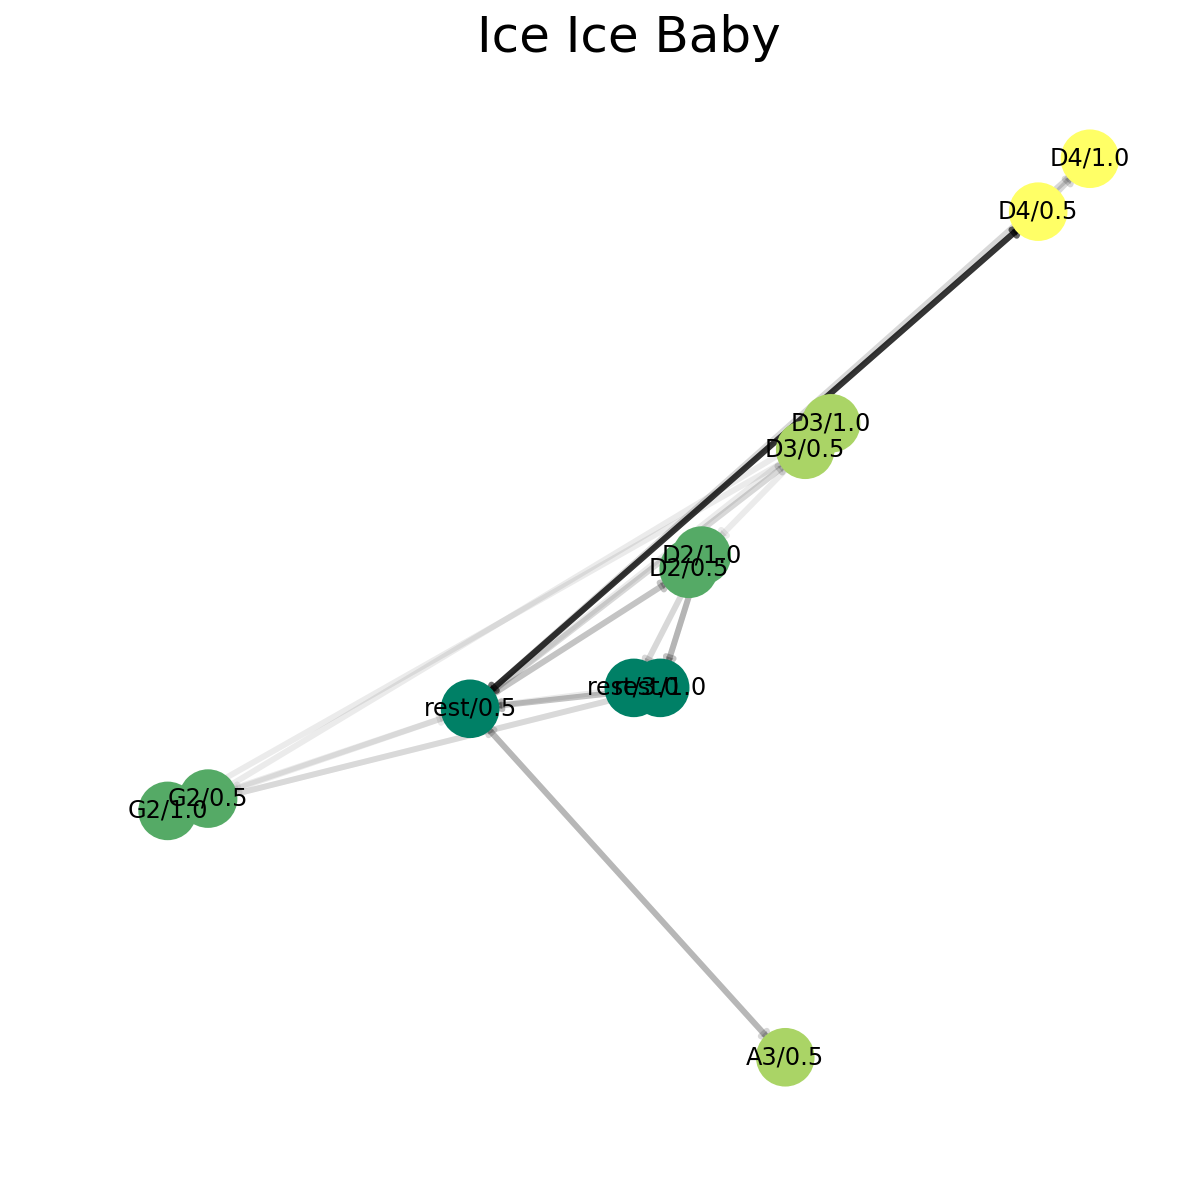

In [28]:
plt.figure(figsize=(10,10))
plt.title('Under Pressure',fontsize=25)
graficar(H)

plt.figure(figsize=(10,10))
plt.title('Ice Ice Baby',fontsize=25)
graficar(G)


In [16]:
 lista_partes[1]

'Contrabajo'